<a href="https://colab.research.google.com/github/DonMaCuandoNoEscribe/IBM-Python-for-Data-Science-Projects/blob/main/Estadisticas_Zillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importar las bibliotecas necesarias

# Bibliotecas relacionadas con Google Colab para interactuar con archivos y salida
from google.colab import output, drive, files

import pandas as pd  # Biblioteca para manipulación y análisis de datos
import numpy as np  # Biblioteca para computación numérica
import requests  # Biblioteca HTTP para realizar solicitudes
import warnings  # Biblioteca para controlar mensajes de advertencia
from datetime import datetime # Parar trabajar con el tiempo
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter

# Suprimir advertencias
warnings.filterwarnings("ignore")

# Configuración de Pandas para mostrar todas las columnas en los dataframes
pd.set_option("display.max_columns", None)

#Llave del API
api_key = "0b87a275-6104-427a-b919-c69087cb620b"


In [4]:
urls = {"Haddon": "https://www.zillow.com/haddon-township-nj/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A39.925796%2C%22south%22%3A39.888518%2C%22east%22%3A-75.037615%2C%22west%22%3A-75.10331%7D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22usersSearchTerm%22%3A%22Haddon%20Township%2C%20NJ%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A397684%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
        "Cinnaminson": "https://www.zillow.com/cinnaminson-township-nj/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A40.036811%2C%22south%22%3A39.967397%2C%22east%22%3A-74.95824%2C%22west%22%3A-75.031005%7D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22usersSearchTerm%22%3A%22Cinnaminson%20Township%2C%20NJ%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A24079%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
        "Collingswood" : "https://www.zillow.com/collingswood-nj/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A39.926472%2C%22south%22%3A39.90464%2C%22east%22%3A-75.056405%2C%22west%22%3A-75.096149%7D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22usersSearchTerm%22%3A%22Collingswood%2C%20NJ%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A8350%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
        "Merchantville": "https://www.zillow.com/merchantville-nj/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A39.976057%2C%22south%22%3A39.924631%2C%22east%22%3A-75.013129%2C%22west%22%3A-75.089831%7D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22usersSearchTerm%22%3A%22Merchantville%2C%20NJ%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A32815%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D",
        "Pennsauken":"https://www.zillow.com/pennsauken-nj/?searchQueryState=%7B%22mapBounds%22%3A%7B%22north%22%3A39.996031%2C%22south%22%3A39.933487%2C%22east%22%3A-75.010146%2C%22west%22%3A-75.123821%7D%2C%22isMapVisible%22%3Afalse%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22usersSearchTerm%22%3A%22Pennsauken%2C%20NJ%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A6463%2C%22regionType%22%3A6%7D%5D%2C%22pagination%22%3A%7B%7D%7D"
        }

In [33]:
### --- Funciones --- ###

# Función para obtener listados de Zillow
def get_listings(api_key, listing_url):
    """
    Obtiene listados de Zillow API.

    Parámetros:
        - api_key (str): Tu clave API para acceder a la API de Zillow.
        - listing_url (str): URL del listado.

    Retorna:
        - Objeto de respuesta: Respuesta que contiene los datos de los listados.
    """
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"

    querystring = {
        "api_key": api_key,  # Clave API para acceder a los datos
        "url": listing_url  # Enlace del listado que estamos analizando
    }

    return requests.request("GET", url, params=querystring)


def plot_avg_price_by_zip(cleaned_data, zip_code, column, color, plot_type='bar',
                          title='', xlabel='', ylabel='Precio Promedio'):
    # Filter data for the specific ZIP code
    zip_data = cleaned_data[cleaned_data['hdpData.homeInfo.zipcode'] == zip_code]
    # Calculate the average price grouped by the specified column and convert to thousands
    avg_price = zip_data.groupby(column)['price'].mean() / 1000


    if avg_price.empty:
        print("No data available to plot.")
        return

    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot based on the specified plot type
    if plot_type == 'bar':
        plt.bar(avg_price.index, avg_price.values, color=color)
    elif plot_type == 'line':
        plt.plot(avg_price.index, avg_price.values, linestyle='-', color=color)

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Format the y-axis to show values in thousands
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}k'))

    # Show the plot
    plt.show()

def plot_avg_price(cleaned_data, column, color, plot_type='bar', title='',
                   xlabel='', ylabel='Precio Promedio'):
    avg_price = cleaned_data.groupby(column)['price'].mean() / 1000  # Convert to thousands

    plt.figure(figsize=(12, 6))
    if plot_type == 'bar':
        plt.bar(avg_price.index, avg_price.values, color=color)
    elif plot_type == 'line':
        plt.plot(avg_price.index, avg_price.values, linestyle='-', color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}k'))

    if column == 'hdpData.homeInfo.zipcode':
        plt.xticks(ticks=avg_price.index, labels=[f'{int(x)}' for x in avg_price.index], rotation=90)


    plt.show()
    print()

def plot_avg_price_by_city(cleaned_data, city, column, color, plot_type='bar',
                           title='', xlabel='', ylabel='Precio Promedio'):
    # Filter data for the specified city
    city_data = cleaned_data[cleaned_data['hdpData.homeInfo.city'] == city]

    # Calculate the average price grouped by the specified column
    avg_price = city_data.groupby(column)['price'].mean() / 1000  # Convert to thousands

    # Plot the data
    plt.figure(figsize=(12, 6))
    if plot_type == 'bar':
        plt.bar(avg_price.index, avg_price.values, color=color)
    elif plot_type == 'line':
        plt.plot(avg_price.index, avg_price.values, linestyle='-', color=color)

    # Set the plot title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}k'))

    # Display the plot
    plt.show()
    print()

In [10]:
### --- Extraer los datos --- ###

#Crear un diccionario de datos:
data_frames = {}

# Extarer los datos
for key in urls.keys():
  listing_url = urls[key]
  listing_response = get_listings(api_key, listing_url)
  df = listing_response.json()
  num_of_properties = listing_response.json()["data"]["categoryTotals"]["cat1"]["totalResultCount"]
  print(f"Conteo de propiedades {key}:", num_of_properties)
  df = pd.json_normalize(listing_response.json()["data"]["cat1"]["searchResults"]["mapResults"])
  data_frames[key] = df

Conteo de propiedades Haddon: 16
Conteo de propiedades Cinnaminson: 24
Conteo de propiedades Collingswood: 20
Conteo de propiedades Merchantville: 25
Conteo de propiedades Pennsauken: 23


In [11]:
### --- Combinar los datos --- ###

# Definir las columnas de interes
columns_of_interest = ['zpid','price', 'beds', 'baths', 'area',
                       'hdpData.homeInfo.city','address', "brokerName",
                       'hdpData.homeInfo.zipcode', 'timeOnZillow']
# Combinar
combined_df = pd.concat(data_frames.values(), ignore_index=True)

data = combined_df.copy()

columns_of_interest = ['zpid','price', 'beds', 'baths', 'area',
                       'hdpData.homeInfo.city','address', "brokerName",
                       'hdpData.homeInfo.zipcode', 'timeOnZillow']
cleaned_data = data[columns_of_interest]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      108 non-null    object 
 1   price                     108 non-null    object 
 2   beds                      104 non-null    float64
 3   baths                     99 non-null     float64
 4   area                      104 non-null    float64
 5   hdpData.homeInfo.city     108 non-null    object 
 6   address                   108 non-null    object 
 7   brokerName                108 non-null    object 
 8   hdpData.homeInfo.zipcode  108 non-null    object 
 9   timeOnZillow              108 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 8.6+ KB


In [12]:
### --- Limpiar Datos --- ###

# Precios
cleaned_data["price"] = cleaned_data["price"].str.replace("$", "")
cleaned_data["price"] = cleaned_data["price"].str.replace(",", "")
cleaned_data["price"] = cleaned_data["price"].str.replace("From", "")
cleaned_data["price"] = cleaned_data["price"].str.replace("K", "000")
cleaned_data["price"] = cleaned_data["price"].astype(int)

# Eliminar columnas con blancos
cleaned_data = cleaned_data.dropna(subset=['zpid','price', 'beds', 'baths',
                                           'hdpData.homeInfo.city'])
cleaned_data.info()

# Calcular precio promedio por pie cuadrado (use 100 sqf increments)
cleaned_data['area_increment'] = (cleaned_data['area'] // 100) * 100

#Guardar
date = datetime.now().strftime("%Y-%m-%d")
cleaned_data.to_csv(f"datos{date}.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zpid                      99 non-null     object 
 1   price                     99 non-null     int64  
 2   beds                      99 non-null     float64
 3   baths                     99 non-null     float64
 4   area                      99 non-null     float64
 5   hdpData.homeInfo.city     99 non-null     object 
 6   address                   99 non-null     object 
 7   brokerName                99 non-null     object 
 8   hdpData.homeInfo.zipcode  99 non-null     object 
 9   timeOnZillow              99 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 8.5+ KB


In [13]:
# Diccionario de parametros
plot_params = {
    'beds': {'column': 'beds',
             'color': 'blue',
             'title': 'Precio Promedio por Numero de Cuartos',
             'xlabel': 'Numero de Cuartos'},
    'baths': {'column': 'baths',
              'color': 'green',
              'title': 'Precio Promedio por Numero De Baños',
              'xlabel': 'Numero de Baños'},
    'area_increment': {'column': 'area_increment',
                       'color': 'red',
                       'plot_type': 'line',
                       'title': 'Precio Promedio por Pies Cuadrados(Incrementos de 100 Pies^2)',
                       'xlabel': 'Pies Cuadrados'},
    'zipcode': {'column': 'hdpData.homeInfo.zipcode',
                'color': 'purple',
                'title': 'Precio Promedio por Zip',
                'xlabel': 'Codigo Zip'}}
zip_plot_params = {
    'beds': {'column': 'beds',
             'color': 'blue',
             'title': 'Precio Promedio por Numero de Cuartos',
             'xlabel': 'Numero de Cuartos'},
    'baths': {'column': 'baths',
              'color': 'green',
              'title': 'Precio Promedio por Numero De Baños',
              'xlabel': 'Numero de Baños'},
    'area_increment': {'column': 'area_increment',
                       'color': 'red',
                       'plot_type': 'line',
                       'title': 'Precio Promedio por Pies Cuadrados(Incrementos de 100 Pies^2)',
                       'xlabel': 'Pies Cuadrados'}}

Ciudad: Mount Ephraim (4)


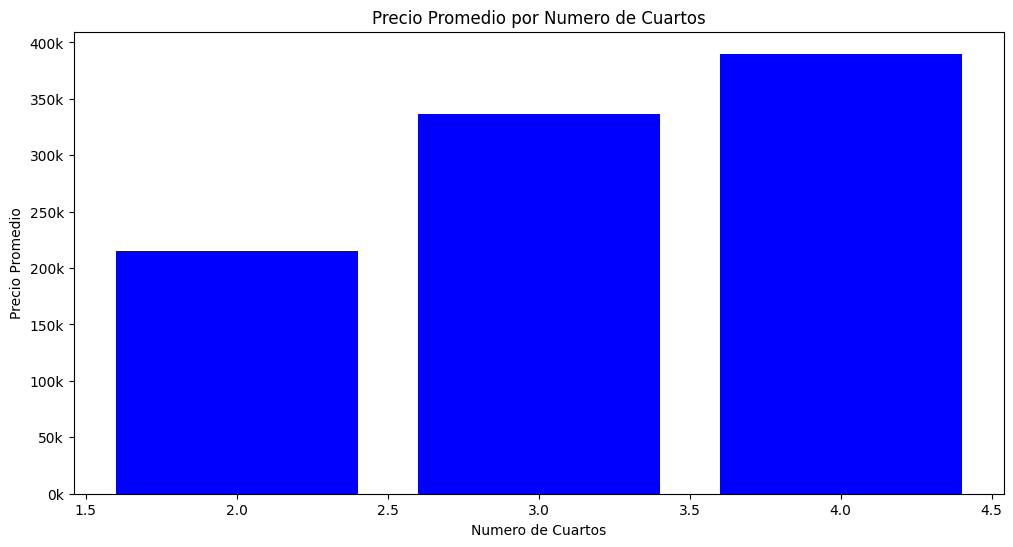

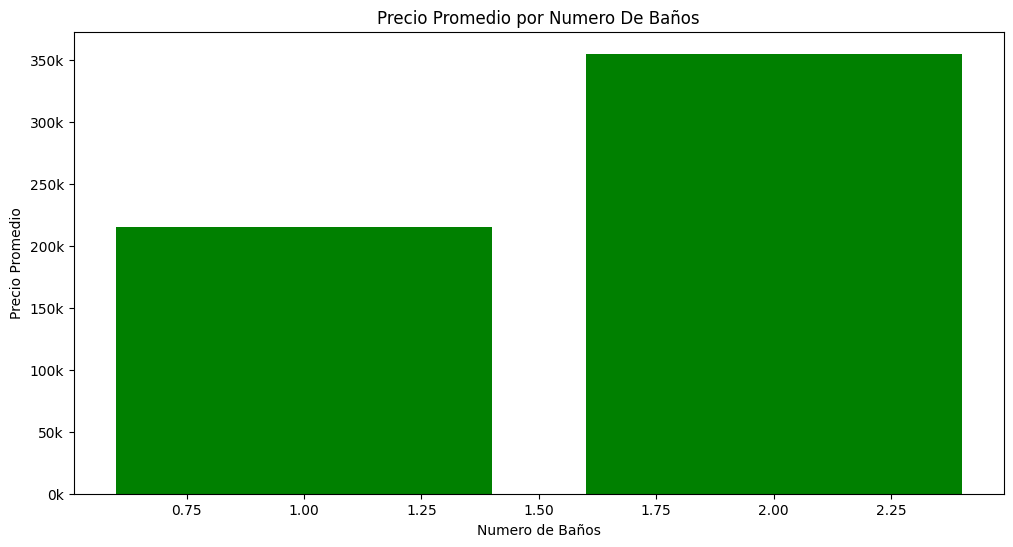

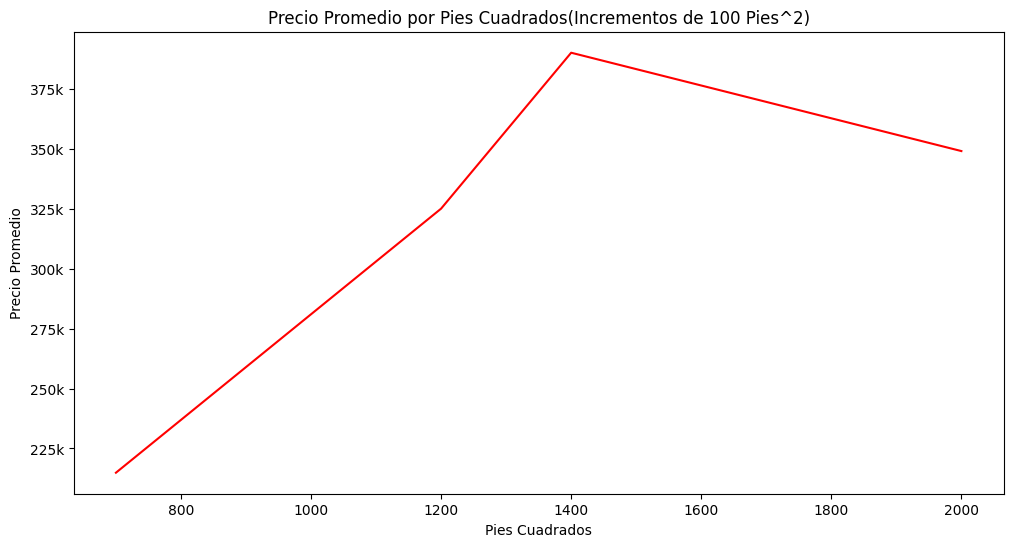


Ciudad: Haddon Township (11)


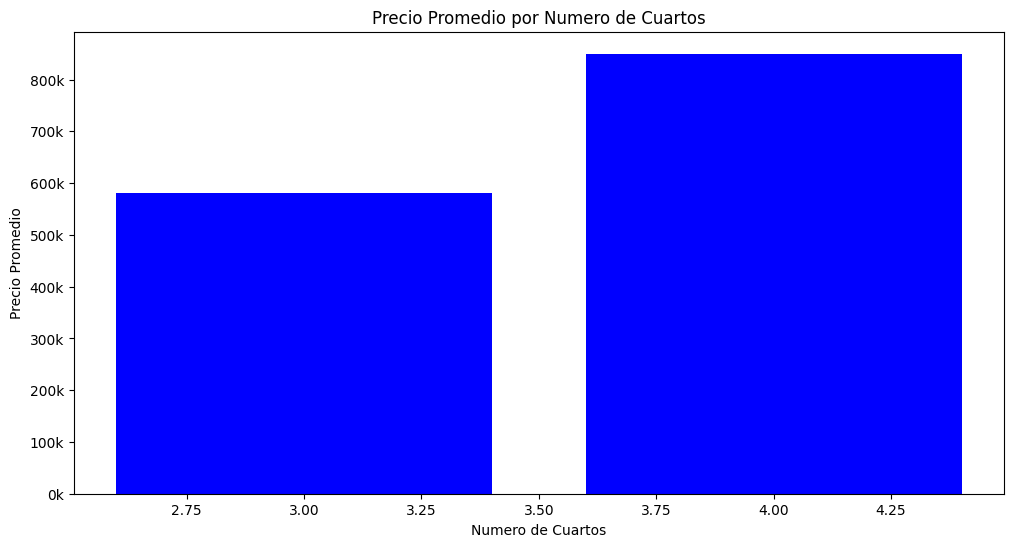

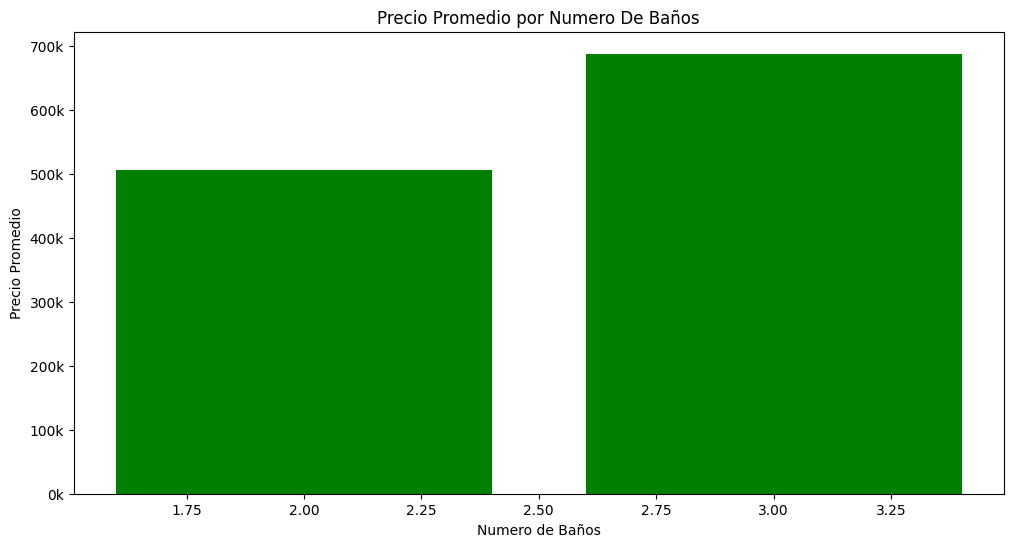

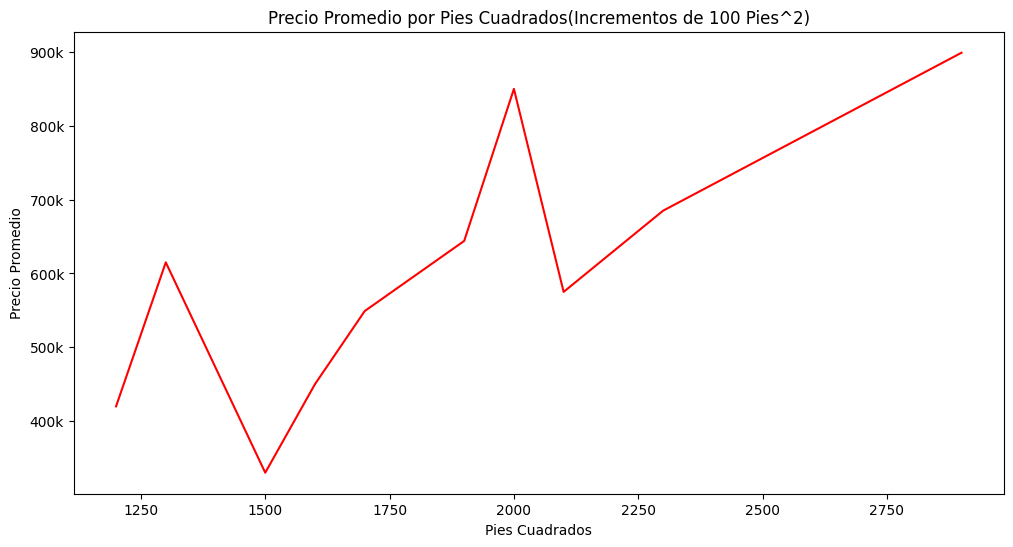


Ciudad: Cinnaminson (22)


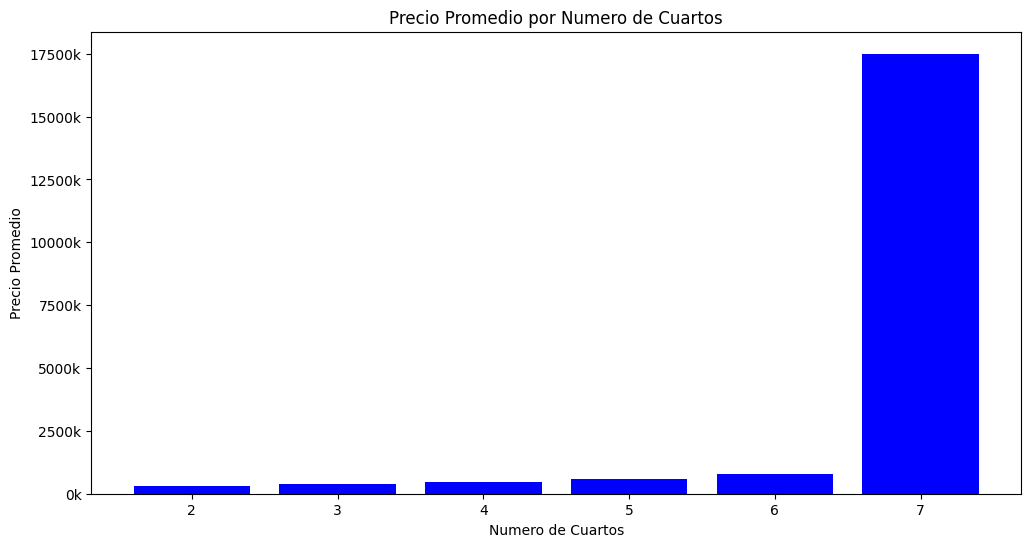

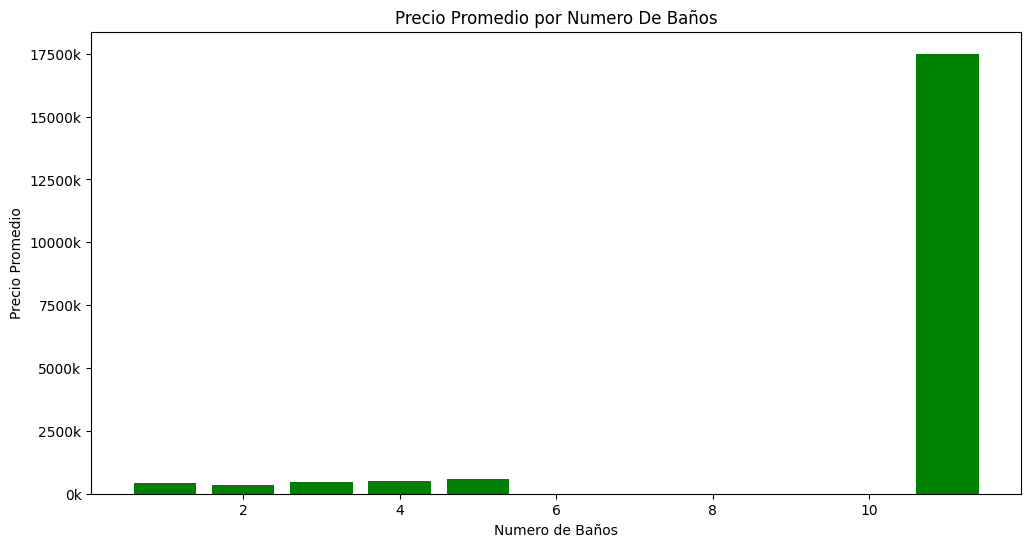

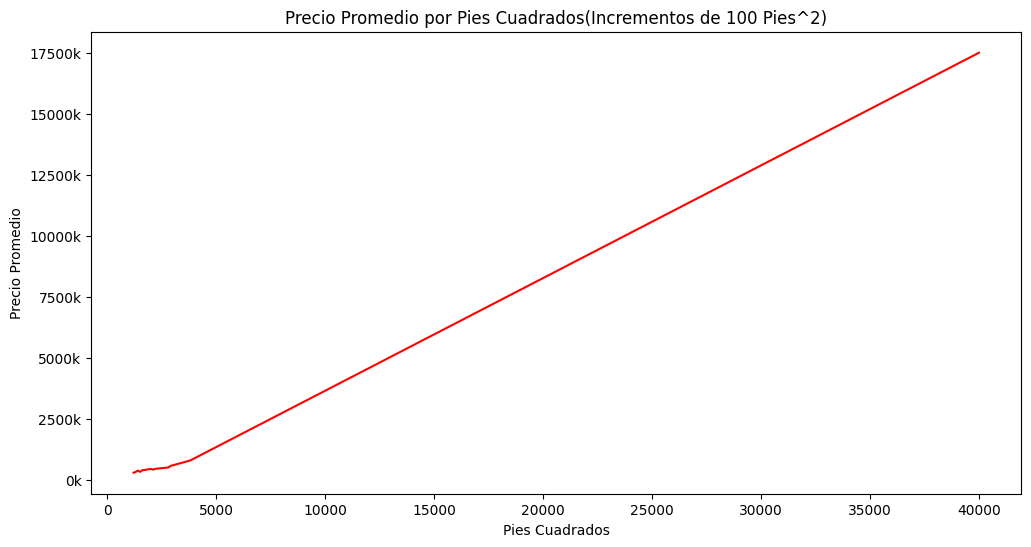


Ciudad: Collingswood (16)


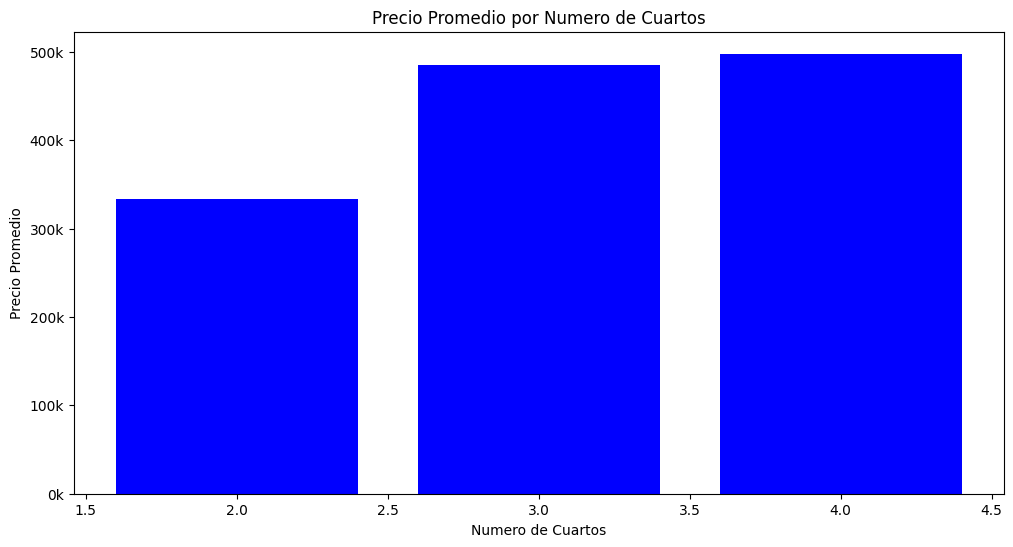

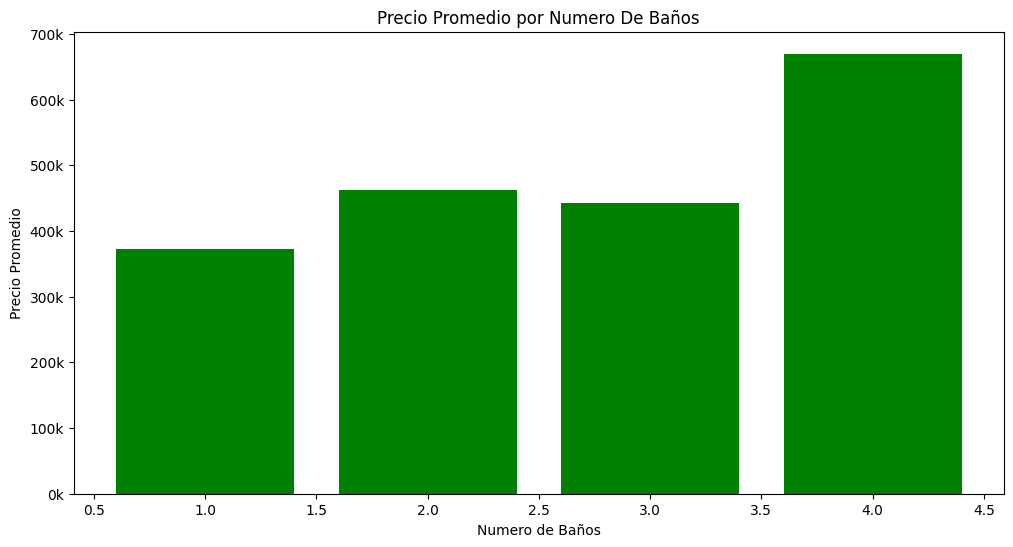

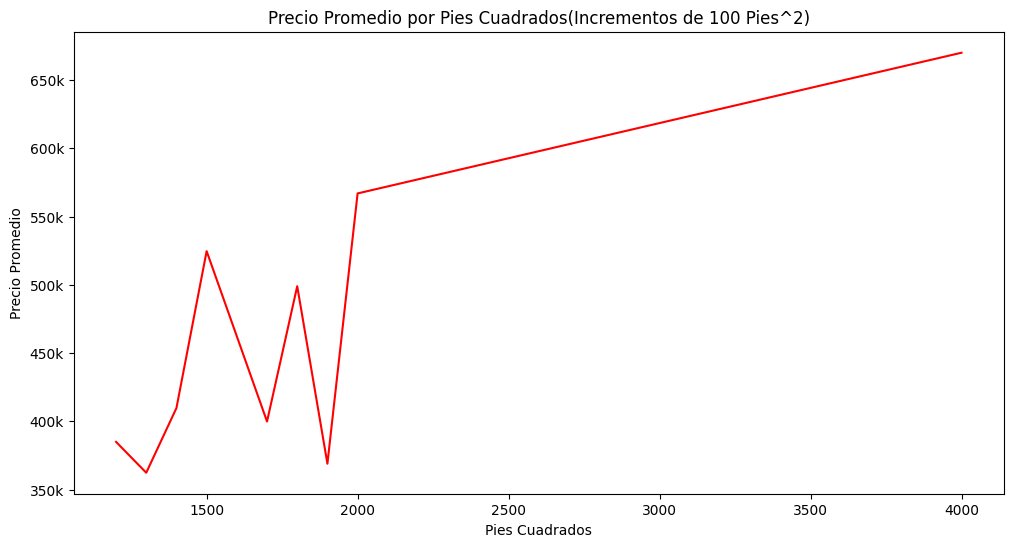


Ciudad: Oaklyn (4)


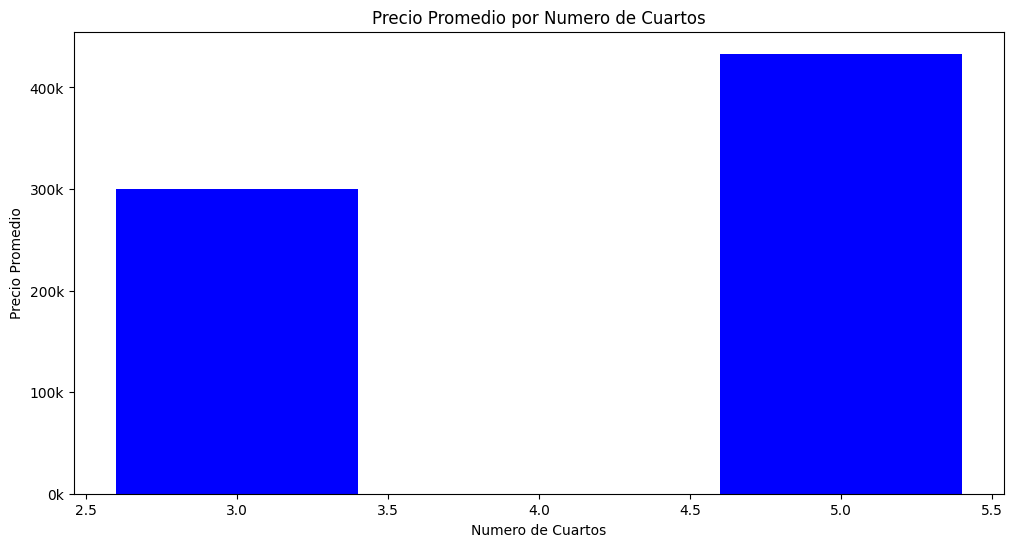

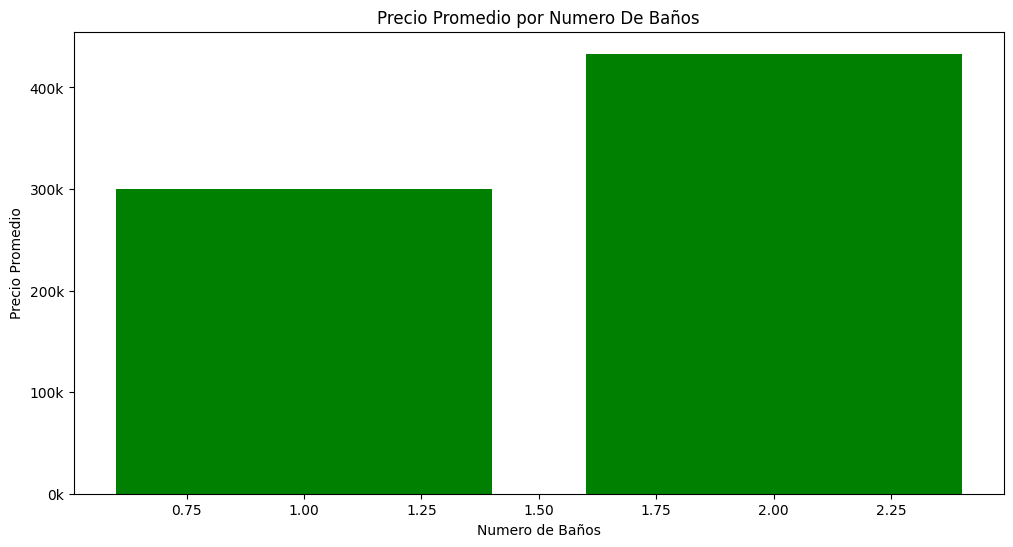

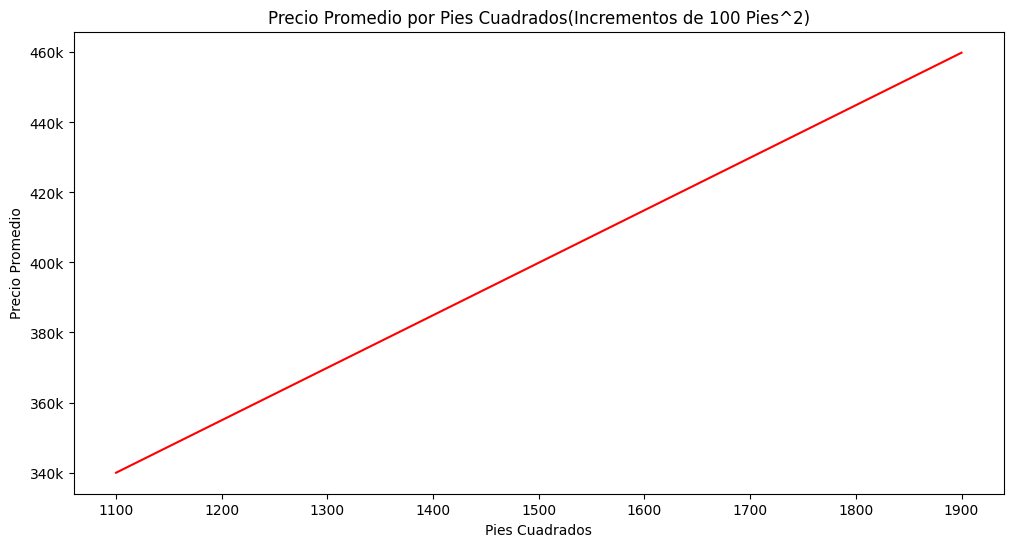


Ciudad: Pennsauken (34)


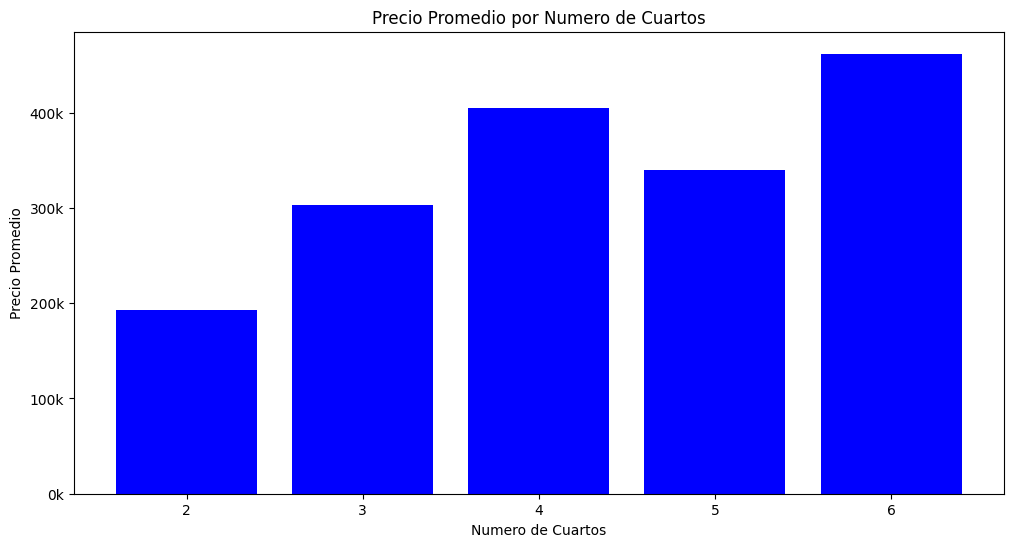

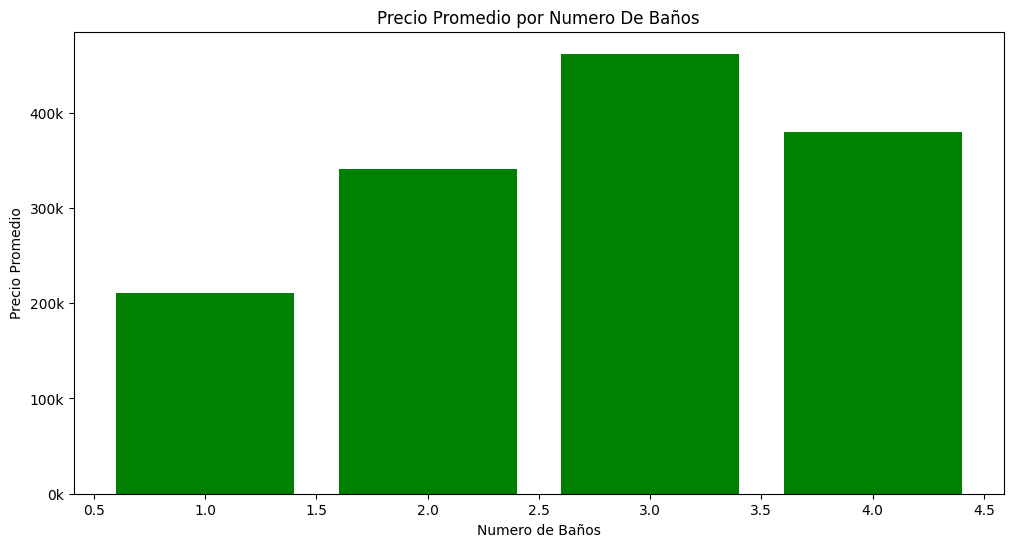

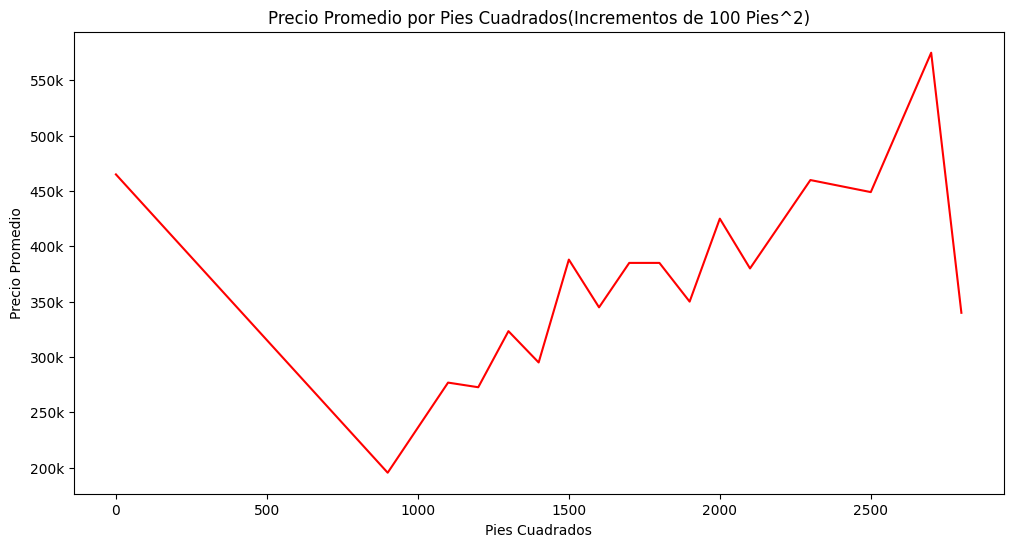


Ciudad: Merchantville (8)


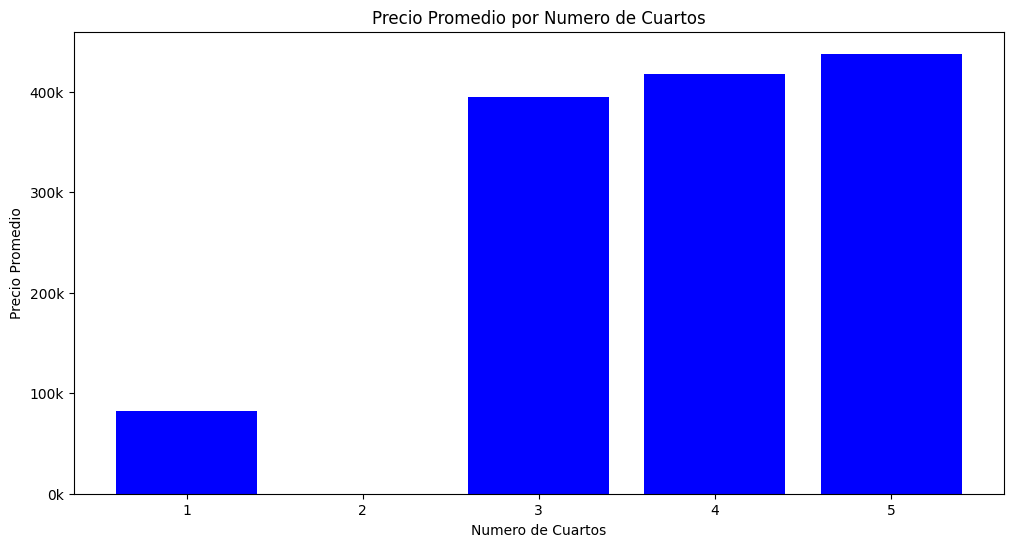

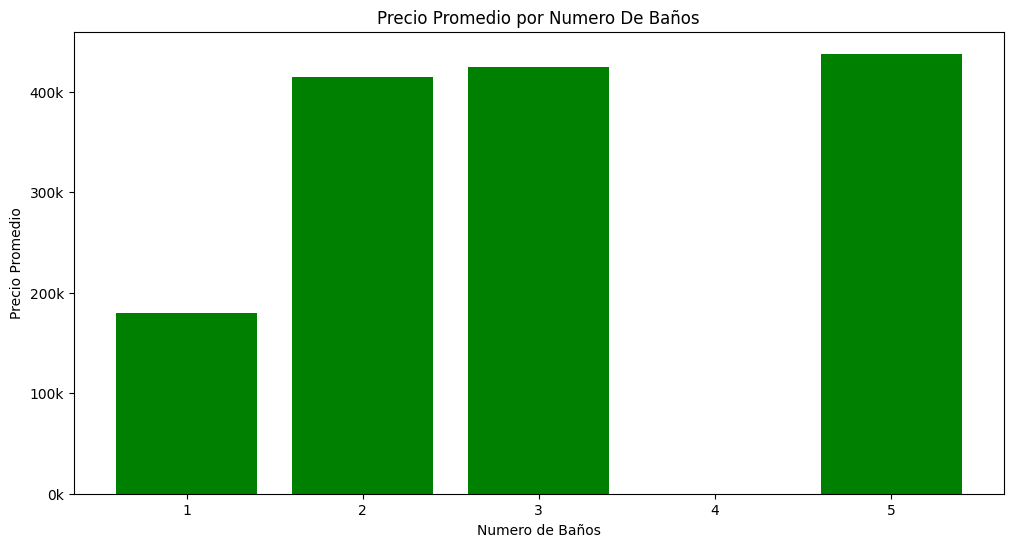

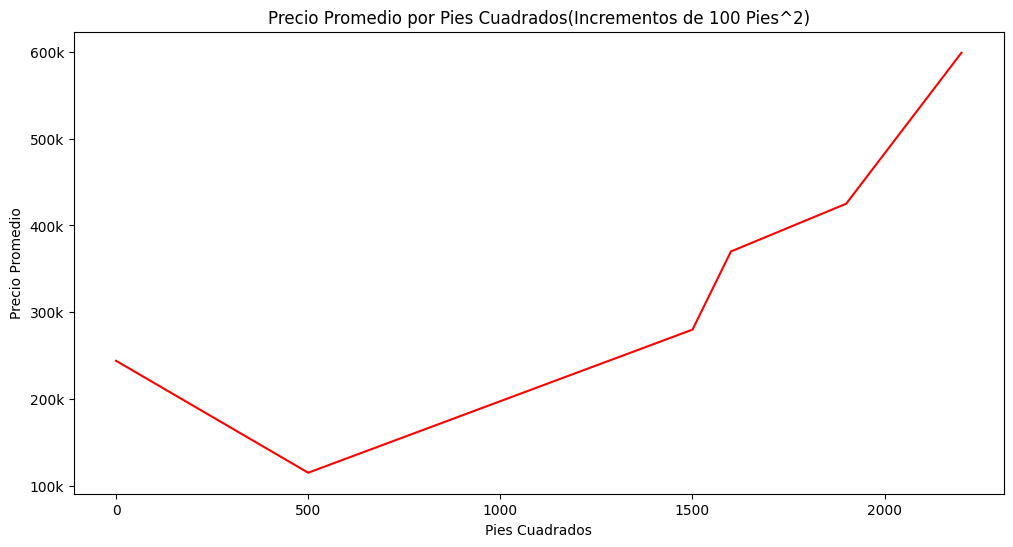

In [16]:
#Estadisticas por ciudad

cities = cleaned_data['hdpData.homeInfo.city'].unique()
for city in cities:
  city_count = cleaned_data[cleaned_data['hdpData.homeInfo.city'] == city].shape[0]
  print(f"Ciudad: {city} ({city_count})")

  for key, params in zip_plot_params.items():
      plot_avg_price_by_city(cleaned_data,city, **params)

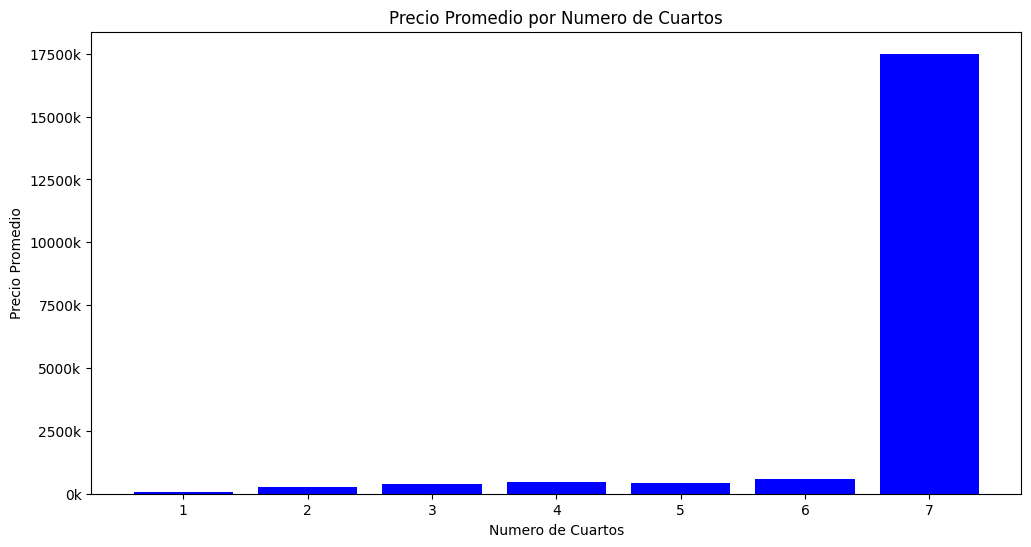

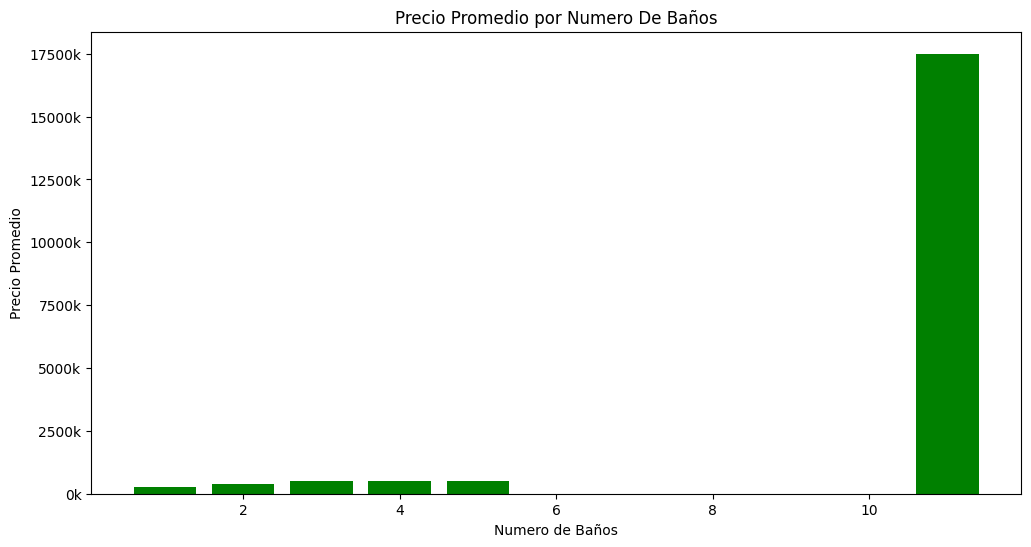

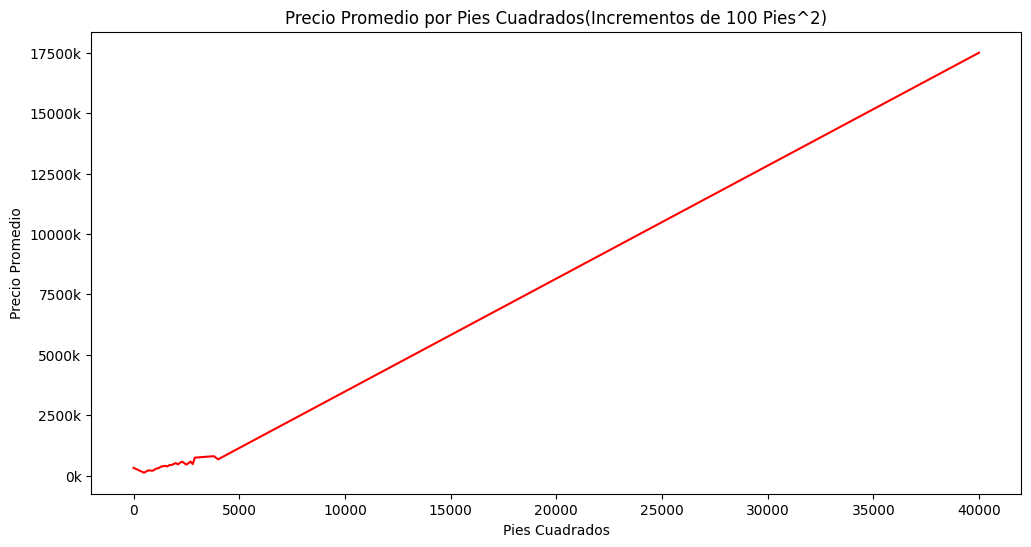

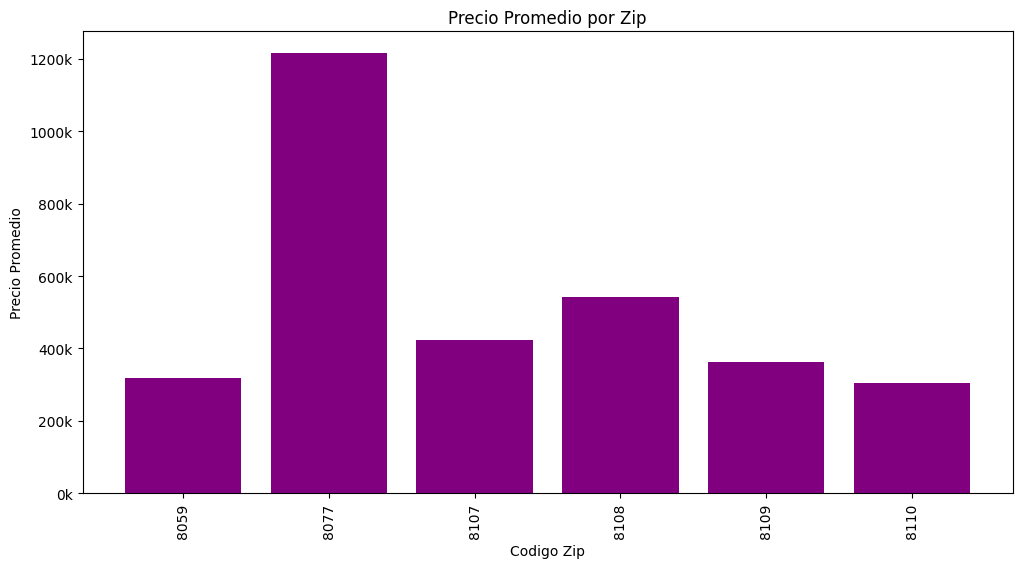

In [30]:
#Estadisticas totales
for key, params in plot_params.items():
    plot_avg_price(cleaned_data, **params)

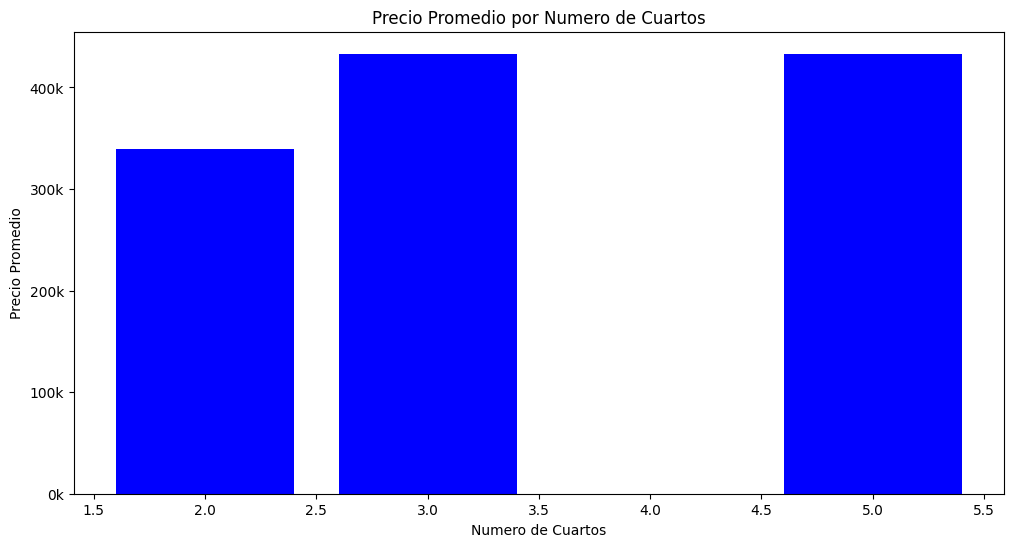

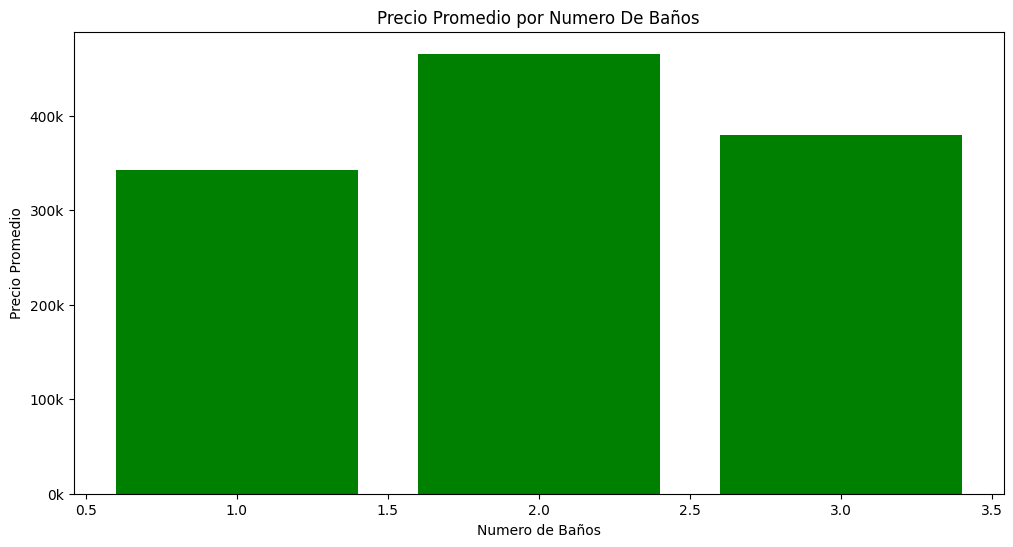

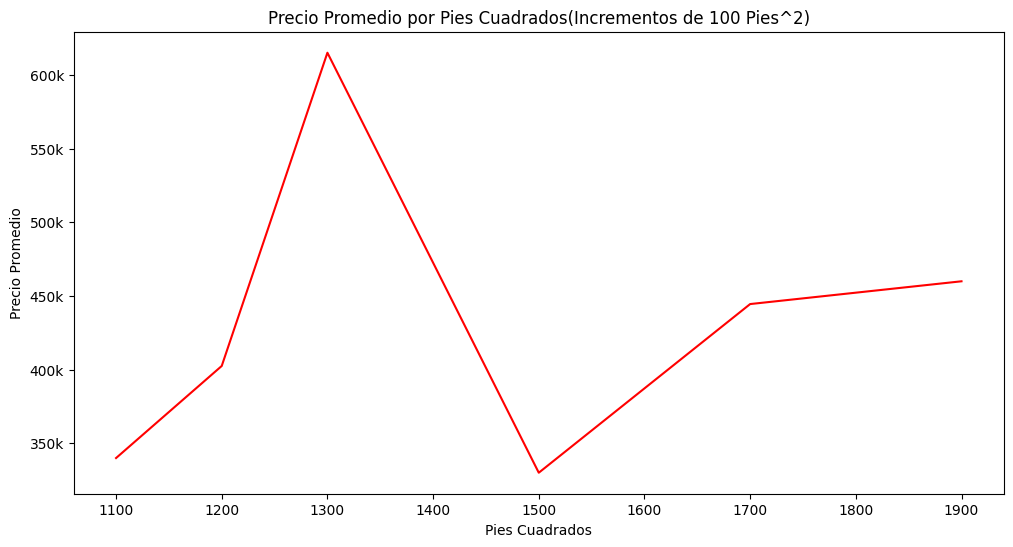

In [34]:
#Estadisticas por Zip

#Zip de interes
zip_code = "08107"

# Loop over the dictionary and plot each graph
for key, params in zip_plot_params.items():
    plot_avg_price_by_zip(cleaned_data, zip_code ,**params)